###Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the file
df_Original=pd.read_csv('/content/EV_Data.csv')
pd.set_option('display.float_format',lambda x: '%.3f'%x)
df=df_Original.copy()
df.head()

,Unnamed: 0,Age,City,Profession,Marital Status,Education,No. of Family members,Annual Income,Would you prefer replacing all your vehicles to Electronic vehicles?,If Yes/Maybe what type of EV would you prefer?,Do you think Electronic Vehicles are economical?,Which brand of vehicle do you currently own?,How much money could you spend on an Electronic vehicle?,Preference for wheels in EV,Do you think Electronic vehicles will replace fuel cars in India?
0,0,30,Nabha,None,Single,Graduate,5,1193875.647,Maybe,SUV,Yes,Hyundai,<5 lakhs,2,I don't think so
1,1,27,Pune,None,Single,Graduate,4,1844540.398,Yes,SUV,Yes,Honda,<15 lakhs,4,"Yes, in <20years"
2,2,32,Kashipur,None,Single,Graduate,4,2948150.113,Yes,Hatchback,Yes,KIA,<15 lakhs,4,"Yes, in <20years"
3,3,55,Pune,Business,Single,Graduate,3,2832379.739,Maybe,Hatchback,No,Hyundai,<5 lakhs,4,"Yes, in <10 years"
4,4,26,Satara,None,Single,Graduate,4,2638750.576,Yes,Sedan,Yes,McLaren,<15 lakhs,4,"Yes, in <20years"


##Data Preprocessing

In [3]:
df.isnull().sum()

Unnamed: 0                                                              0
Age                                                                     0
City                                                                    0
Profession                                                              0
Marital Status                                                          0
Education                                                               0
No. of Family members                                                   0
Annual Income                                                           0
Would you prefer replacing all your vehicles to Electronic vehicles?    0
If Yes/Maybe what type of  EV would you prefer?                         0
Do you think Electronic Vehicles are economical?                        0
Which brand of vehicle do you currently own?                            0
How much money could you spend on an Electronic vehicle?                0
Preference for wheels in EV           

no null values present in the data

In [7]:
# View column names
df.columns

Index(['Unnamed: 0', 'Age', 'City', 'Profession', 'Marital Status',
       'Education', 'No. of Family members', 'Annual Income',
       'Would you prefer replacing all your vehicles to Electronic vehicles?',
       'If Yes/Maybe what type of  EV would you prefer?',
       'Do you think Electronic Vehicles are economical?',
       'Which brand of vehicle do you currently own?',
       'How much money could you spend on an Electronic vehicle?',
       'Preference for wheels in EV',
       'Do you think Electronic vehicles will replace fuel cars in India?'],
      dtype='object')

In [8]:
#shape of dataset
df.shape

(1000, 15)

In [10]:
#dataset information
df.info

<bound method DataFrame.info of      Unnamed: 0  Age       City Profession Marital Status      Education  \
0             0   30      Nabha       None         Single       Graduate   
1             1   27       Pune       None         Single       Graduate   
2             2   32  Kashipur        None         Single       Graduate   
3             3   55       Pune   Business         Single       Graduate   
4             4   26     Satara       None         Single       Graduate   
..          ...  ...        ...        ...            ...            ...   
995         995   31       Pune       None        Married       Graduate   
996         996   29       Pune       None        Married  Post Graduate   
997         997   30     Mumbai   Business         Single       Graduate   
998         998   24  Ahmedabad       None        Married       Graduate   
999         999   30       Pune   Business         Single       Graduate   

     No. of Family members  Annual Income  \
0         

In [11]:
df['Age'].unique()

array([ 30,  27,  32,  55,  26,  28,  23,  25,  43,  59,  21,  29,  56,
        70,  50,  24,  61,  39,  31,  40,  18,  58,  22,  96,  64,  52,
        54,  42,  49,  57,  46,  36,  20,  19,  65,  17,  60,  44,  45,
        47,  82,  33,  37,  48,  69,  67,  86,  62,  66,  34,  63,  41,
        68,  16,  53,  15, 118,  38])

above are the unique values in the 'Age' column

In [12]:
df['City'].unique()

array(['Nabha', 'Pune', 'Kashipur ', 'Satara', 'Noida', 'Delhi', 'Mumbai',
       'pune', 'solapur', 'Haldwani ', 'Nellore ', 'Pune ', 'Haldwani',
       'Banglore ', 'Faridabad ', 'Nagpur', 'Chandrapur ', 'Chennai',
       'Gurugram ', 'Nashik', 'Bengaluru', 'Mumbai ', 'Hakdwani',
       'Patiyala', 'pUNE', 'Ahmedabad', 'Karnal', 'Rewari', 'New Delhi',
       'Serampore', 'Jhansi', 'New Delhi ', 'Jalandhar', 'Delhi ',
       'nashik'], dtype=object)

As we can see in the unique city values, the names of some cities are spelt differently which makes them unique


In [13]:
df["City"] = df["City"].replace({"Pune":"Pune", "pUNE": "Pune", "pune": "Pune", "Pune ": "Pune"})
df["City"] = df["City"].replace({"Mumbai ":"Mumbai", "Mumbai": "Mumbai"})
df["City"] = df["City"].replace({"Banglore ":"Bengaluru"})
df["City"] = df["City"].replace({"Delhi":"New Delhi", "Delhi ": "New Delhi", "New Delhi ": "New Delhi"})
df["City"] = df["City"].replace({"Hakdwani":"Haldwani", "Haldwani ": "Haldwani"})
df["City"] = df["City"].replace({"nashik":"Nashik"})

Here we replace all the mis-spelt names of the cities with the city name.

In [15]:
df['No. of Family members'].unique()

array([5, 4, 3, 2, 8, 6, 0, 1, 7])

In [16]:
df['How much money could you spend on an Electronic vehicle?'].unique()

array(['<5 lakhs', '<15 lakhs', '<25 lakhs', '700000', '>25 lakhs',
       '2000000', '1200000', '1500000'], dtype=object)

In [17]:
df.drop('Unnamed: 0',axis=1,inplace=True)

## Data Visualization

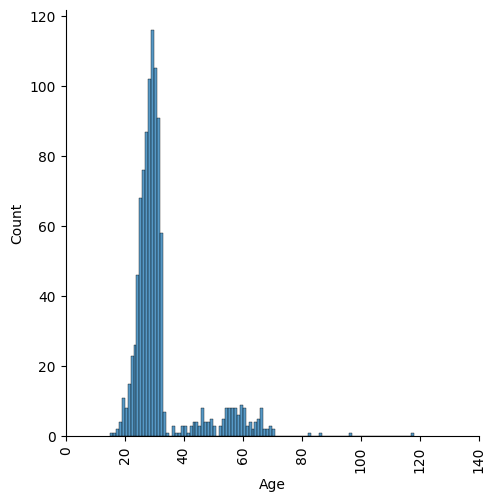

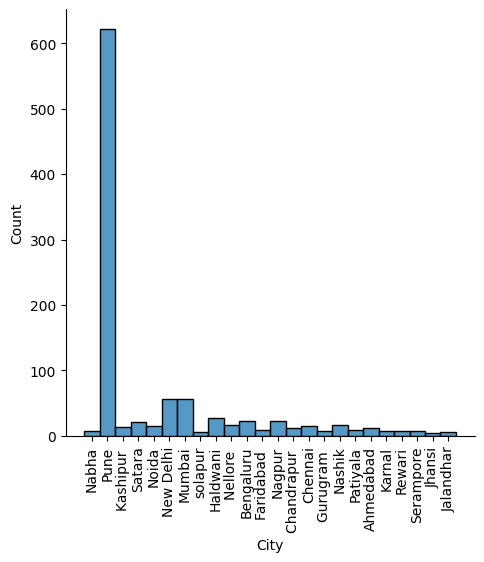

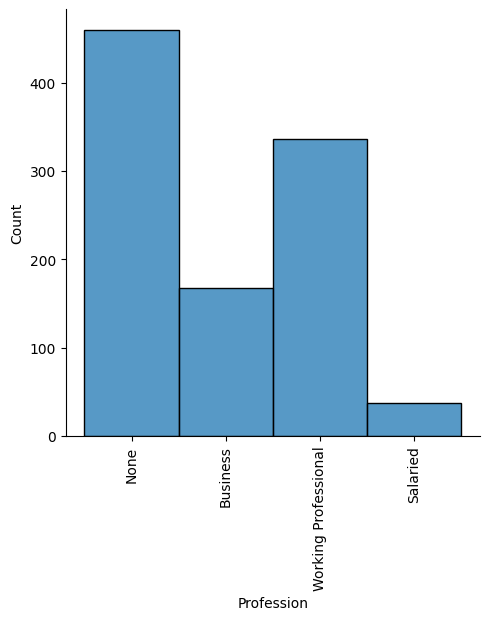

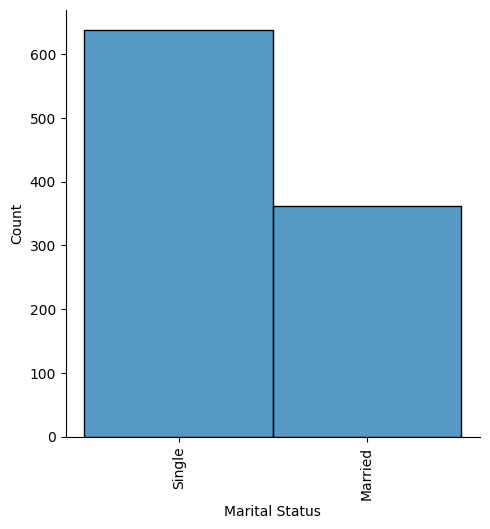

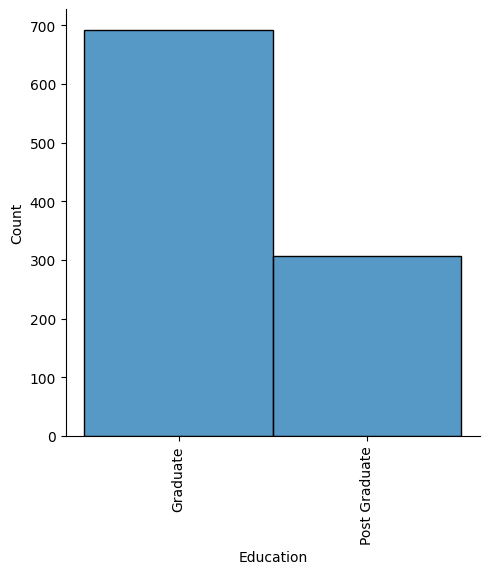

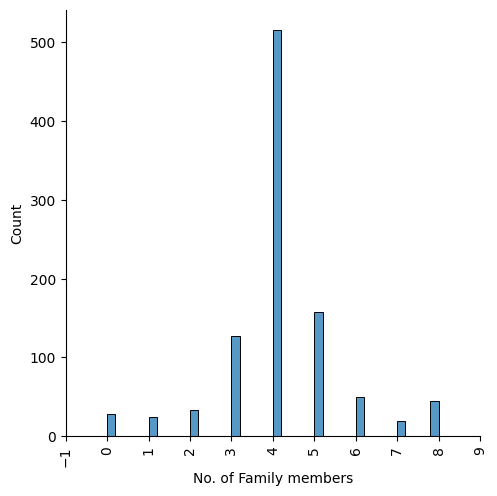

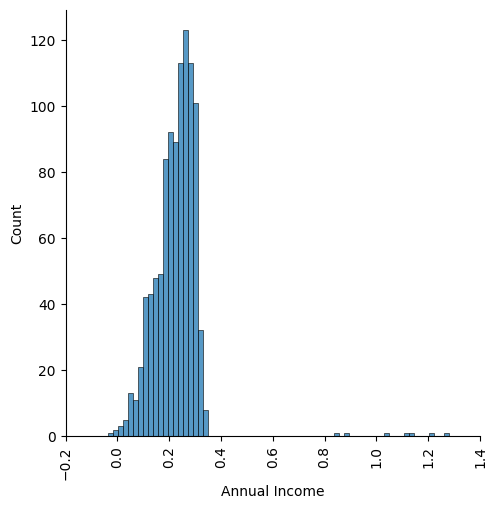

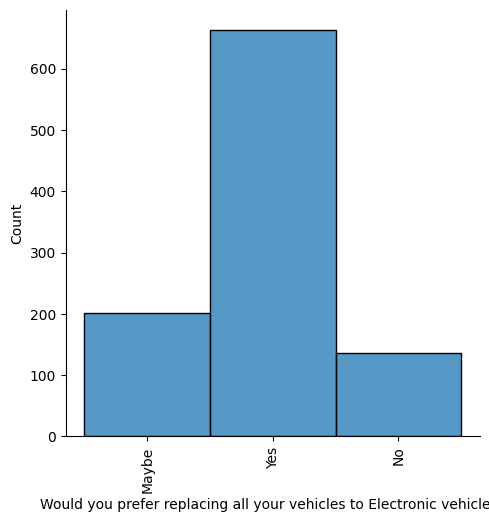

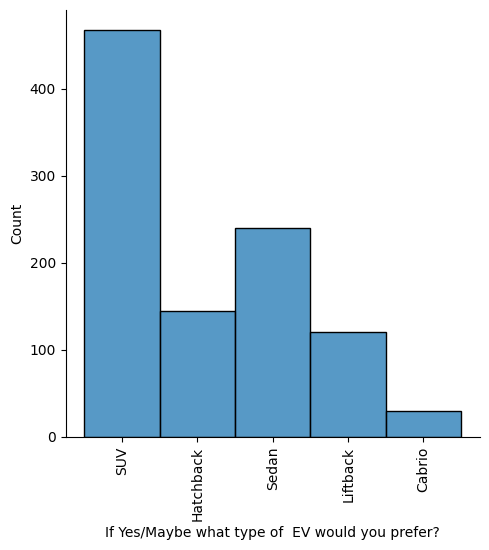

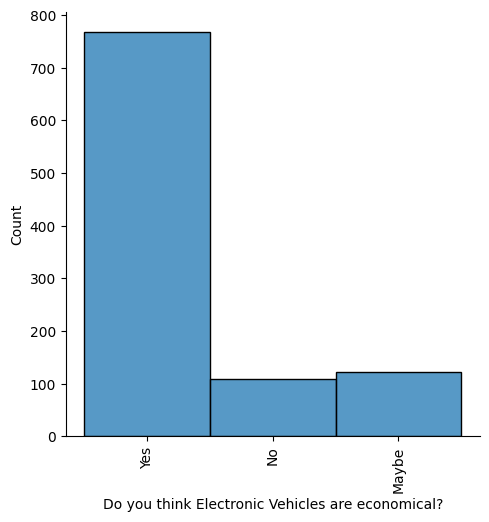

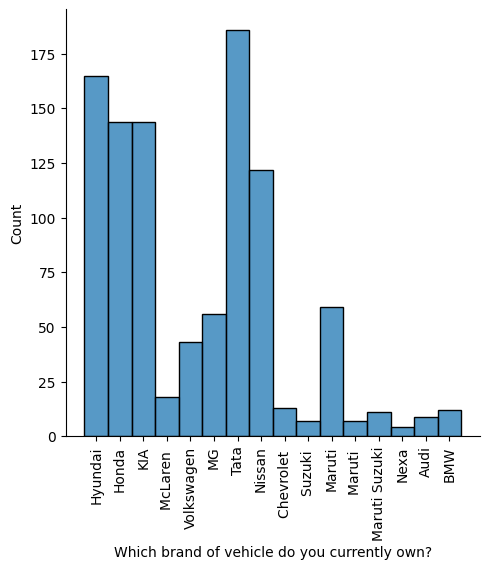

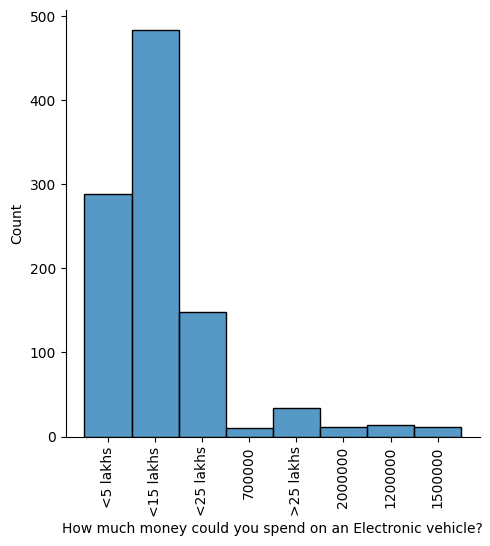

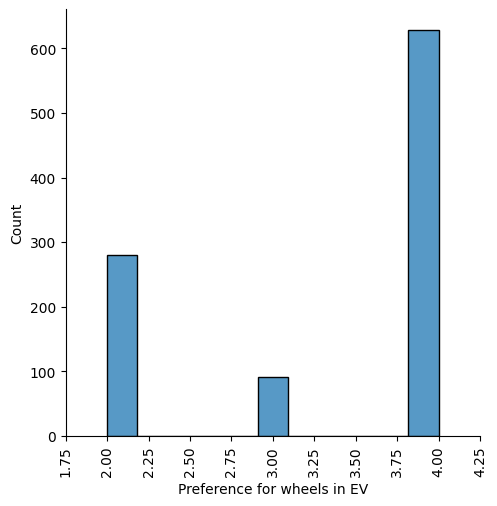

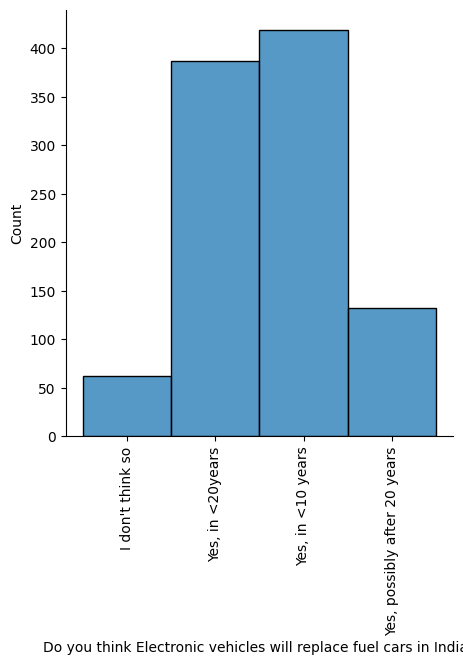

In [18]:
for col in df.columns:
  ax=sns.displot(df[col])
  ax.set_xticklabels(rotation=90)

Most people prefer four wheelers


Most people believe electronic vehicles will replace fuel cars in  India in less than 20 years.





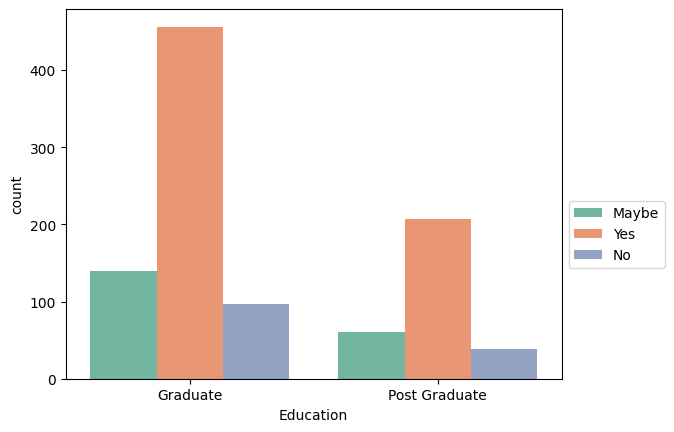

In [33]:
sns.countplot(x ='Education', hue = 'Would you prefer replacing all your vehicles to Electronic vehicles?',  data = df, palette = 'Set2')
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()

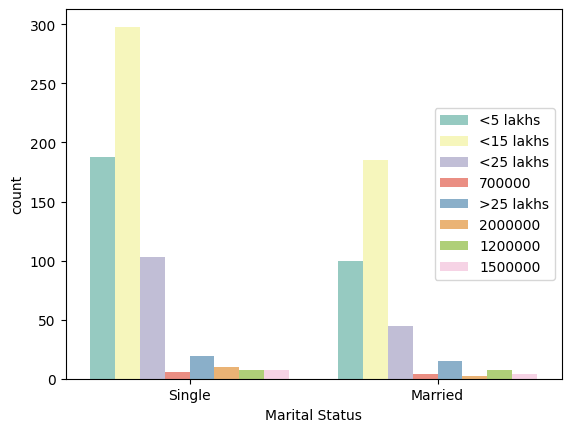

In [34]:
sns.countplot(x ='Marital Status', hue = 'How much money could you spend on an Electronic vehicle?',  data = df, palette = 'Set3')
plt.legend(loc='center right')
plt.show()

In [35]:
df.describe()

,Age,No. of Family members,Annual Income,Preference for wheels in EV
count,1000.000,1000.000,1000.000,1000.000
mean,31.800,4.118,2258341.824,3.349
std,11.295,1.470,999355.758,0.888
min,15.000,0.000,-376150.863,2.000
25%,26.000,4.000,1782115.520,2.000
50%,29.000,4.000,2329246.375,4.000
75%,31.000,5.000,2753169.612,4.000
max,118.000,8.000,12821282.030,4.000


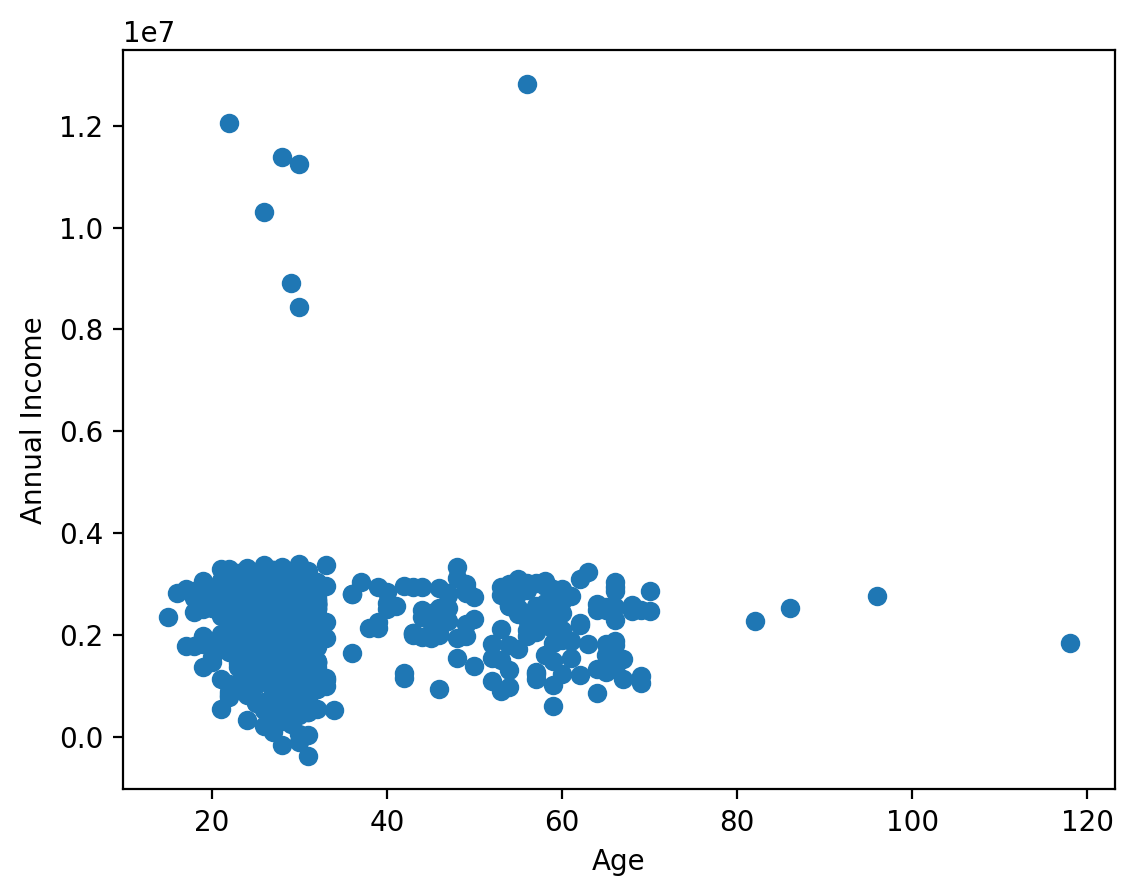

In [37]:
plt.figure(dpi=200)
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.scatter(df['Age'],df['Annual Income'])

<Axes: xlabel='Age', ylabel='count'>

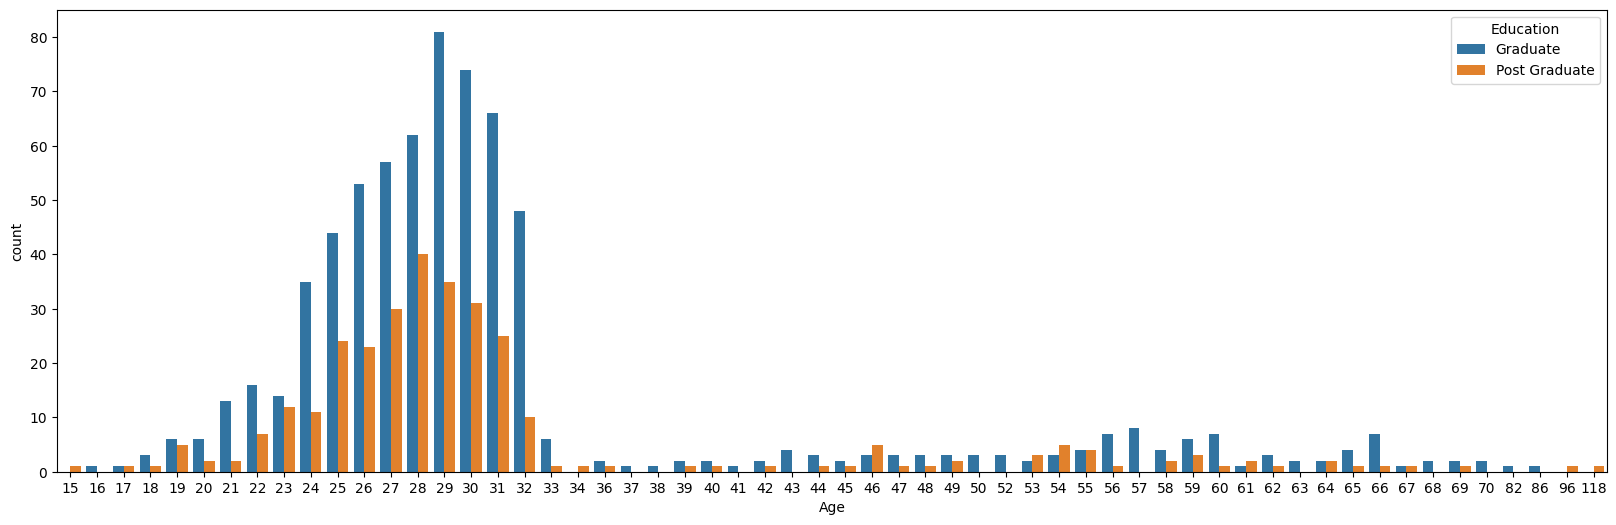

In [38]:
plt.figure(figsize=(20,6))
sns.countplot(x="Age", data=df, hue="Education")

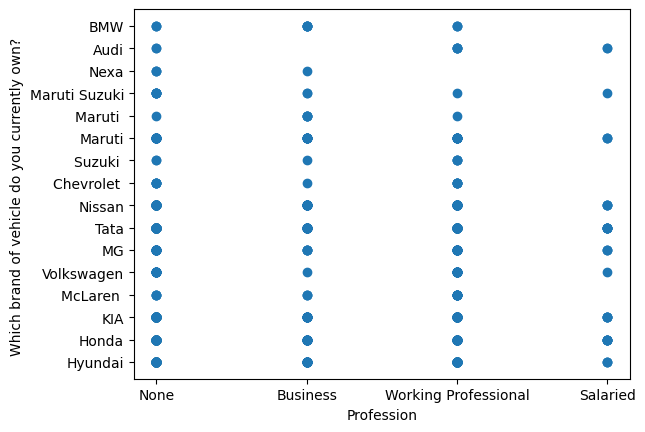

In [39]:
plt.xlabel('Profession')
plt.ylabel('Which brand of vehicle do you currently own? ')
plt.scatter(df['Profession'],df['Which brand of vehicle do you currently own?'])

<Axes: xlabel='Which brand of vehicle do you currently own?', ylabel='count'>

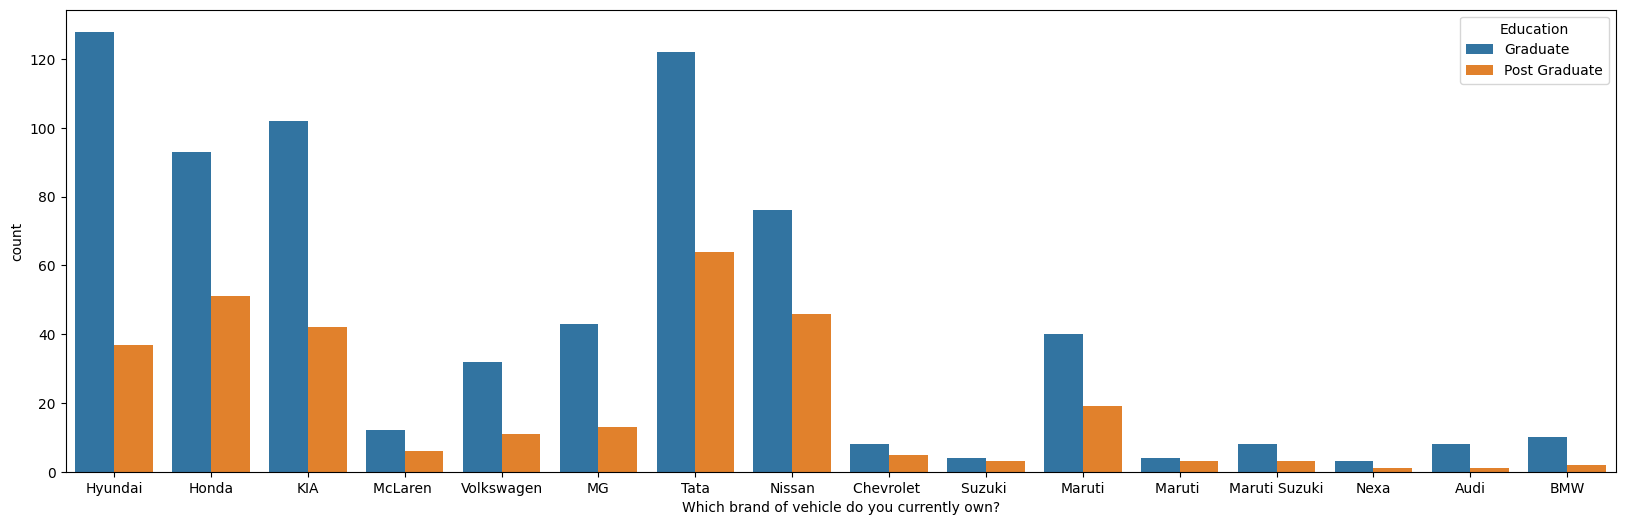

In [40]:
plt.figure(figsize=(20,6))
sns.countplot(x="Which brand of vehicle do you currently own?", data=df, hue="Education")

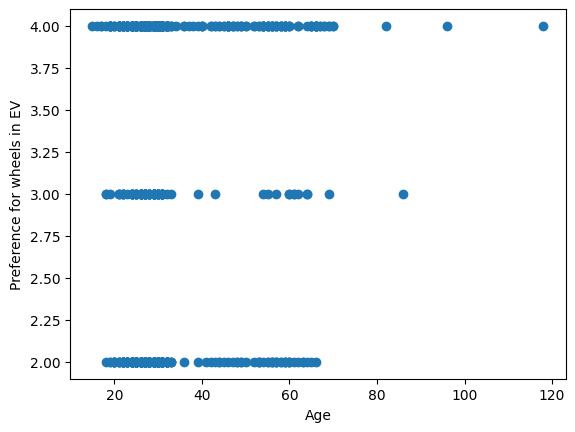

In [41]:
plt.xlabel('Age')
plt.ylabel('Preference for wheels in EV')
plt.scatter(df['Age'],df['Preference for wheels in EV'])

<Axes: >

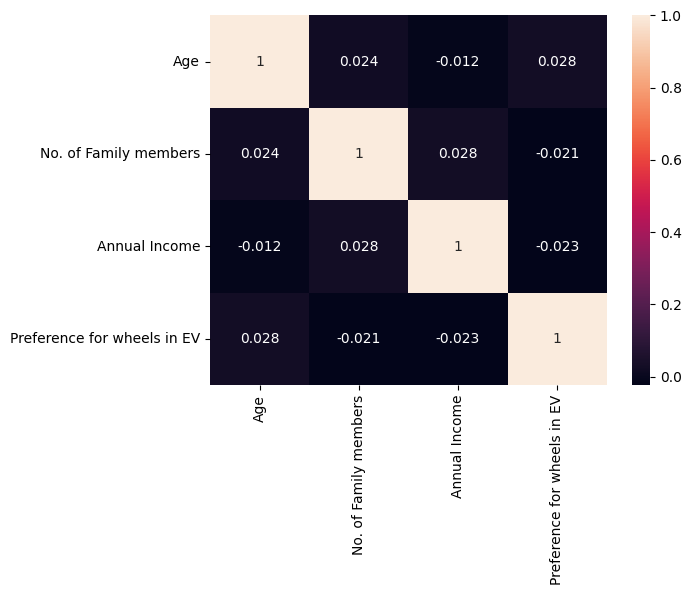

In [42]:
sns.heatmap(df.corr(), annot=True)

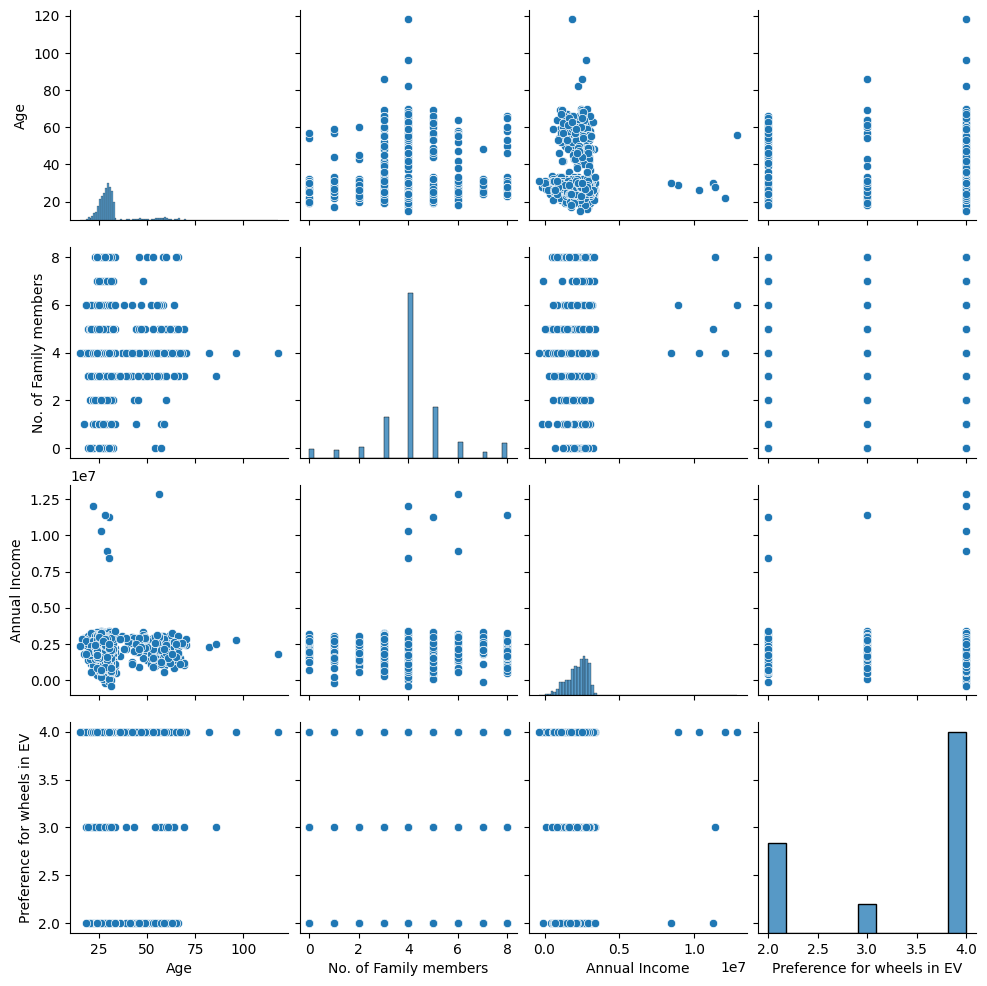

In [43]:
sns.pairplot(df)

In [44]:
from sklearn.preprocessing import LabelEncoder
def label_encode(data,column):
        label_encoder=LabelEncoder()
        return label_encoder.fit_transform(data[column].astype(str))

In [45]:
df['City']= label_encode(df,'City')
df['Profession']= label_encode(df,'Profession')
df['Marital Status']= label_encode(df,'Marital Status')
df['Education']= label_encode(df,'Education')
df['Would you prefer replacing all your vehicles to Electronic vehicles?']= label_encode(df,'Would you prefer replacing all your vehicles to Electronic vehicles?')
df['If Yes/Maybe what type of  EV would you prefer?']= label_encode(df,'If Yes/Maybe what type of  EV would you prefer?')
df['Do you think Electronic Vehicles are economical?']= label_encode(df,'Do you think Electronic Vehicles are economical?')
df['Which brand of vehicle do you currently own?']= label_encode(df,'Which brand of vehicle do you currently own?')
df['Do you think Electronic vehicles will replace fuel cars in India?']= label_encode(df,'Do you think Electronic vehicles will replace fuel cars in India?')
df['How much money could you spend on an Electronic vehicle?']= label_encode(df,'How much money could you spend on an Electronic vehicle?')

In [46]:
df.head()

,Age,City,Profession,Marital Status,Education,No. of Family members,Annual Income,Would you prefer replacing all your vehicles to Electronic vehicles?,If Yes/Maybe what type of EV would you prefer?,Do you think Electronic Vehicles are economical?,Which brand of vehicle do you currently own?,How much money could you spend on an Electronic vehicle?,Preference for wheels in EV,Do you think Electronic vehicles will replace fuel cars in India?
0,30,12,1,1,0,5,1193875.647,0,3,2,4,6,2,0
1,27,19,1,1,0,4,1844540.398,2,3,2,3,4,4,2
2,32,10,1,1,0,4,2948150.113,2,1,2,5,4,4,2
3,55,19,0,1,0,3,2832379.739,0,1,1,4,6,4,1
4,26,21,1,1,0,4,2638750.576,2,4,2,10,4,4,2


With the help of LabelEncoder we have converted the string values into integer values.

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [48]:
y = df['City']
X = df.drop(['City'],axis=1,inplace = True)

In [49]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [50]:
X = df.iloc[:,:-1]


In [51]:
calc_vif(X)


,variables,VIF
0,Age,7.954
1,Profession,2.900
2,Marital Status,2.704
3,Education,1.445
4,No. of Family members,8.199
5,Annual Income,5.669
6,Would you prefer replacing all your vehicles t...,4.127
7,If Yes/Maybe what type of EV would you prefer?,7.080
8,Do you think Electronic Vehicles are economical?,6.238
9,Which brand of vehicle do you currently own?,3.854


VIF equal to 1 means variables are not correlated

VIF between 1 and 5 means variables are moderately correlated

VIF greater than 5 means variables are highly correlated

#K Means Model

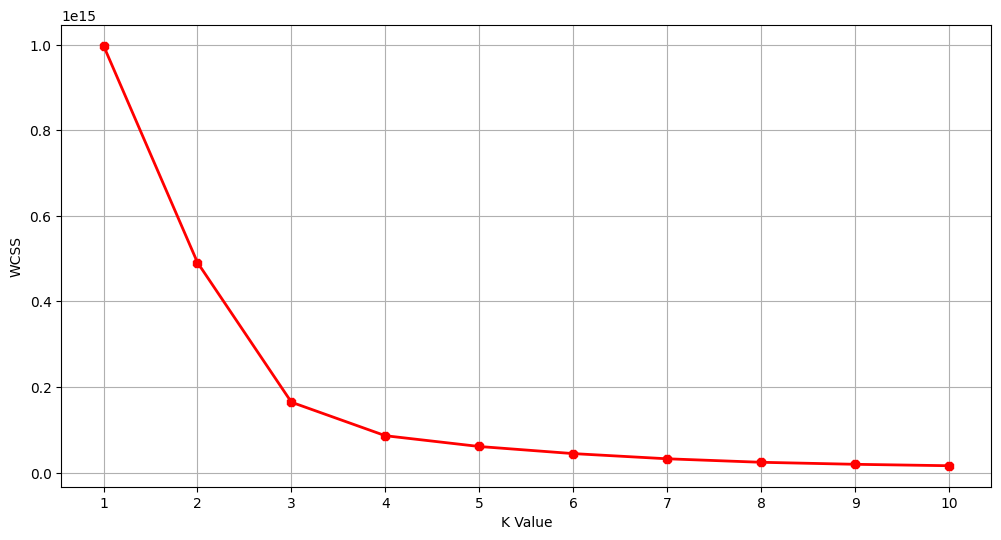

In [52]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++",random_state=28)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

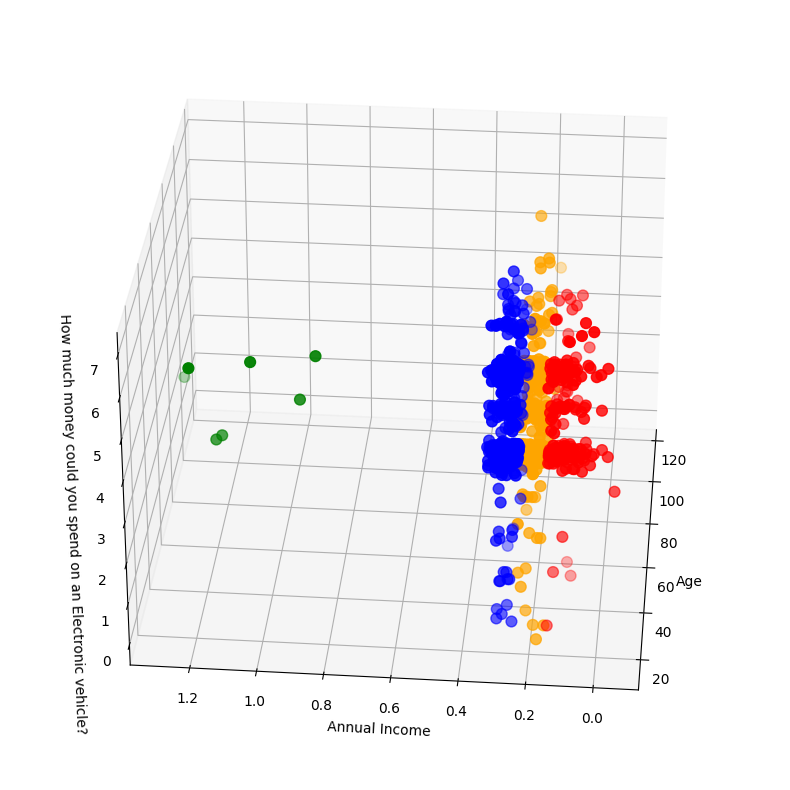

In [53]:
km = KMeans(n_clusters=4, random_state=28)
clusters = km.fit_predict(df)
df["Cluster"] = clusters

df_Original["Cluster"] = clusters

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.Cluster == 0], df["Annual Income"][df.Cluster == 0], df["How much money could you spend on an Electronic vehicle?"][df.Cluster == 0], c='blue', s=60)
ax.scatter(df.Age[df.Cluster == 1], df["Annual Income"][df.Cluster == 1], df["How much money could you spend on an Electronic vehicle?"][df.Cluster == 1], c='red', s=60)
ax.scatter(df.Age[df.Cluster == 2], df["Annual Income"][df.Cluster == 2], df["How much money could you spend on an Electronic vehicle?"][df.Cluster == 2], c='green', s=60)
ax.scatter(df.Age[df.Cluster == 3], df["Annual Income"][df.Cluster == 3], df["How much money could you spend on an Electronic vehicle?"][df.Cluster == 3], c='orange', s=60)

ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income")
ax.set_zlabel('How much money could you spend on an Electronic vehicle?')
plt.show()

In [54]:
df1=df_Original.copy()
df1

,Unnamed: 0,Age,City,Profession,Marital Status,Education,No. of Family members,Annual Income,Would you prefer replacing all your vehicles to Electronic vehicles?,If Yes/Maybe what type of EV would you prefer?,Do you think Electronic Vehicles are economical?,Which brand of vehicle do you currently own?,How much money could you spend on an Electronic vehicle?,Preference for wheels in EV,Do you think Electronic vehicles will replace fuel cars in India?,Cluster
0,0,30,Nabha,None,Single,Graduate,5,1193875.647,Maybe,SUV,Yes,Hyundai,<5 lakhs,2,I don't think so,1
1,1,27,Pune,None,Single,Graduate,4,1844540.398,Yes,SUV,Yes,Honda,<15 lakhs,4,"Yes, in <20years",3
2,2,32,Kashipur,None,Single,Graduate,4,2948150.113,Yes,Hatchback,Yes,KIA,<15 lakhs,4,"Yes, in <20years",0
3,3,55,Pune,Business,Single,Graduate,3,2832379.739,Maybe,Hatchback,No,Hyundai,<5 lakhs,4,"Yes, in <10 years",0
4,4,26,Satara,None,Single,Graduate,4,2638750.576,Yes,Sedan,Yes,McLaren,<15 lakhs,4,"Yes, in <20years",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,Pune,None,Married,Graduate,7,2110722.120,Yes,SUV,Yes,KIA,<25 lakhs,4,"Yes, in <10 years",3
996,996,29,Pune,None,Married,Post Graduate,4,1616287.706,No,SUV,Yes,KIA,<5 lakhs,4,"Yes, in <20years",3
997,997,30,Mumbai,Business,Single,Graduate,4,2202829.029,Yes,SUV,Yes,Honda,<15 lakhs,4,"Yes, in <20years",3
998,998,24,Ahmedabad,None,Married,Graduate,4,1764744.068,Yes,SUV,Yes,Maruti,<15 lakhs,4,"Yes, in <20years",3


In [55]:
df1["City"] = df1["City"].replace({"Pune":"Pune", "pUNE": "Pune", "pune": "Pune", "Pune ": "Pune"})
df1["City"] = df1["City"].replace({"Mumbai ":"Mumbai", "Mumbai": "Mumbai"})
df1["City"] = df1["City"].replace({"Banglore ":"Bengaluru"})
df1["City"] = df1["City"].replace({"Delhi":"New Delhi", "Delhi ": "New Delhi", "New Delhi ": "New Delhi"})
df1["City"] = df1["City"].replace({"Hakdwani":"Haldwani", "Haldwani ": "Haldwani"})
df1["City"] = df1["City"].replace({"nashik":"Nashik"})

In [56]:
df1['Cluster'].value_counts()

0    430
3    368
1    195
2      7
Name: Cluster, dtype: int64

More customers belong to Cluster 0 and 3

Cluster 2 and 1 have very less customers

In [57]:
# Segregrating each cluster

Cluster_0 = df1[df1.Cluster==0]
Cluster_1 = df1[df1.Cluster==1]
Cluster_2 = df1[df1.Cluster==2]
Cluster_3 = df1[df1.Cluster==3]
Cluster_2.shape

(7, 16)

In [58]:
[Cluster_0['Age'].value_counts().head(3),
 Cluster_1['Age'].value_counts().head(3),
 Cluster_2['Age'].value_counts().head(3),
 Cluster_3['Age'].value_counts().head(3)]

[29    47
 28    43
 30    43
 Name: Age, dtype: int64,
 31    28
 30    23
 29    23
 Name: Age, dtype: int64,
 30    2
 26    1
 29    1
 Name: Age, dtype: int64,
 29    45
 28    42
 30    37
 Name: Age, dtype: int64]

Based on Cluster 0 and 3, Age group of 28-31 are to be targeted

In [59]:
[Cluster_0['City'].value_counts().head(),
 Cluster_1['City'].value_counts().head(),
 Cluster_2['City'].value_counts().head(),
 Cluster_3['City'].value_counts().head()]

[Pune         279
 New Delhi     28
 Mumbai        23
 Bengaluru     12
 Haldwani      10
 Name: City, dtype: int64,
 Pune         107
 Mumbai        14
 New Delhi     11
 Haldwani       6
 Chennai        6
 Name: City, dtype: int64,
 Pune         4
 Mumbai       2
 Ahmedabad    1
 Name: City, dtype: int64,
 Pune         231
 New Delhi     18
 Mumbai        17
 Haldwani      11
 Satara         9
 Name: City, dtype: int64]

Pune and Mumbai are the most suitable location to create the early market in EV segment.


In [60]:
[Cluster_0['Profession'].value_counts().head(),
 Cluster_1['Profession'].value_counts().head(),
 Cluster_2['Profession'].value_counts().head(),
 Cluster_3['Profession'].value_counts().head()]

[None                    207
 Working Professional    135
 Business                 73
 Salaried                 15
 Name: Profession, dtype: int64,
 None                    87
 Working Professional    68
 Business                32
 Salaried                 8
 Name: Profession, dtype: int64,
 None                    5
 Working Professional    1
 Business                1
 Name: Profession, dtype: int64,
 None                    161
 Working Professional    132
 Business                 61
 Salaried                 14
 Name: Profession, dtype: int64]

Salaried people are very less interested in EVs

In [61]:
[Cluster_0['Annual Income'].mean(),
 Cluster_1['Annual Income'].mean(),
 Cluster_2['Annual Income'].mean(),
 Cluster_3['Annual Income'].mean()]

[2812149.7606071676, 1097632.5625596757, 10737228.104106281, 2064995.870350378]

Cluster 0 customers have higher average Income, Cluster 1 and 2 have lower avergae income

In [62]:
[Cluster_0['Marital Status'].value_counts().head(),
 Cluster_1['Marital Status'].value_counts().head(),
 Cluster_2['Marital Status'].value_counts().head(),
 Cluster_3['Marital Status'].value_counts().head()]

[Single     283
 Married    147
 Name: Marital Status, dtype: int64,
 Single     133
 Married     62
 Name: Marital Status, dtype: int64,
 Married    5
 Single     2
 Name: Marital Status, dtype: int64,
 Single     220
 Married    148
 Name: Marital Status, dtype: int64]

In [63]:
m=Cluster_3[Cluster_3['Marital Status']=='Single']
m['Would you prefer replacing all your vehicles to Electronic vehicles?'].value_counts()

Yes      147
Maybe     40
No        33
Name: Would you prefer replacing all your vehicles to Electronic vehicles?, dtype: int64

Single Marital Status people should be targeted

In [64]:
[Cluster_0['No. of Family members'].value_counts().head(),
 Cluster_1['No. of Family members'].value_counts().head(),
 Cluster_2['No. of Family members'].value_counts().head(),
 Cluster_3['No. of Family members'].value_counts().head()]

[4    231
 5     63
 3     59
 6     22
 2     14
 Name: No. of Family members, dtype: int64,
 4    88
 5    37
 3    22
 6    14
 8    12
 Name: No. of Family members, dtype: int64,
 4    3
 6    2
 5    1
 8    1
 Name: No. of Family members, dtype: int64,
 4    194
 5     57
 3     46
 8     22
 6     12
 Name: No. of Family members, dtype: int64]

Family with 3-5 members are more interested in EVs

In [65]:
[Cluster_0['Which brand of vehicle do you currently own?'].value_counts().head(),
 Cluster_1['Which brand of vehicle do you currently own?'].value_counts().head(),
 Cluster_2['Which brand of vehicle do you currently own?'].value_counts().head(),
 Cluster_3['Which brand of vehicle do you currently own?'].value_counts().head()]

[Tata       78
 Hyundai    70
 Honda      65
 KIA        61
 Nissan     53
 Name: Which brand of vehicle do you currently own?, dtype: int64,
 Tata       36
 Hyundai    33
 KIA        28
 Honda      26
 Nissan     22
 Name: Which brand of vehicle do you currently own?, dtype: int64,
 Tata       3
 KIA        1
 MG         1
 Honda      1
 Hyundai    1
 Name: Which brand of vehicle do you currently own?, dtype: int64,
 Tata       69
 Hyundai    61
 KIA        54
 Honda      52
 Nissan     47
 Name: Which brand of vehicle do you currently own?, dtype: int64]

Tata,Hyundai,Honda,KIA are the Brands that Customers own most.


After having discussions with Automobile Domain Experts. Below is the details about what each brand is well known for,


Tata - Robust, Safety, Affordable


Hyundai - Unique design, Comfort


Honda - Durability, Performance


KIA - Innovative Features, efficiency.

In [66]:
[Cluster_0['Education'].value_counts().head(),
 Cluster_1['Education'].value_counts().head(),
 Cluster_2['Education'].value_counts().head(),
 Cluster_3['Education'].value_counts().head()]

[Graduate         298
 Post Graduate    132
 Name: Education, dtype: int64,
 Graduate         130
 Post Graduate     65
 Name: Education, dtype: int64,
 Graduate         5
 Post Graduate    2
 Name: Education, dtype: int64,
 Graduate         260
 Post Graduate    108
 Name: Education, dtype: int64]

In [67]:
e=Cluster_3[Cluster_3['Education']=='Graduate']
e['Would you prefer replacing all your vehicles to Electronic vehicles?'].value_counts()

Yes      176
Maybe     50
No        34
Name: Would you prefer replacing all your vehicles to Electronic vehicles?, dtype: int64

In [68]:
y= df_Original['Would you prefer replacing all your vehicles to Electronic vehicles?']
z=df_Original['Cluster']
x = list(zip(y, z))

i = pd.DataFrame(x,columns=['Would you prefer replacing all your vehicles to Electronic vehicles?', 'Cluster'])
(i['Would you prefer replacing all your vehicles to Electronic vehicles?']=='Yes').sum() + (i['Would you prefer replacing all your vehicles to Electronic vehicles?']=='Maybe').sum()

864

864 customers out of 1000 are intersted in EV.

Graduates are more interested in replacing vehicles to EV

In [69]:
print(Cluster_0['If Yes/Maybe what type of  EV would you prefer?'].value_counts().head(3))
print(Cluster_1['If Yes/Maybe what type of  EV would you prefer?'].value_counts().head(3))
print(Cluster_2['If Yes/Maybe what type of  EV would you prefer?'].value_counts().head(3))
print(Cluster_3['If Yes/Maybe what type of  EV would you prefer?'].value_counts().head(3))

SUV          191
Sedan        115
Hatchback     62
Name: If Yes/Maybe what type of  EV would you prefer?, dtype: int64
SUV         97
Sedan       39
Liftback    30
Name: If Yes/Maybe what type of  EV would you prefer?, dtype: int64
SUV          3
Sedan        2
Hatchback    1
Name: If Yes/Maybe what type of  EV would you prefer?, dtype: int64
SUV          176
Sedan         84
Hatchback     55
Name: If Yes/Maybe what type of  EV would you prefer?, dtype: int64


People are more interested in buying SUV's, followed by Sedan and Hatchback in EV Segments